# carbonation module example
This example demonstrates the following steps:
+ raw parameter data
+ initialize model
+ run model
+ calibrate model
+ post-process model results

In [1]:
%matplotlib inline
# Import necessary modules
import rational_rc.math_helper as mh  # Math helper functions
from rational_rc.carbonation import CarbonationModel, load_df_R_ACC # # Carbonation model class and data
import numpy as np

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


Pf(g = R-S < 0) from various methods
    sample count: 0.0002802045493210043
    g integral: 0.0002907722294720924
    R S integral: 0.0002689161432436497
    beta_factor: 3.450626864698889
26.065158690403504 0.00017166376002398508


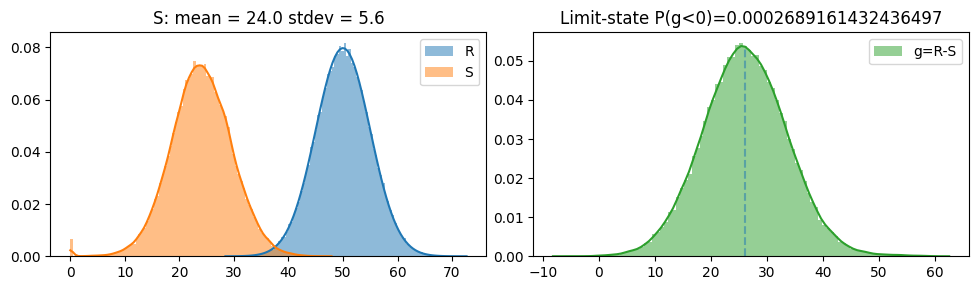

In [2]:
# Define raw parameters for the carbonation model
class Param: 
    pass

pars = Param()

# Concrete cover properties
pars.cover_mean = 50    # Mean concrete cover in mm
pars.cover_std = 5      # Standard deviation of cover in mm

# Environmental and material properties
pars.RH_real = 60       # Relative humidity in %
pars.t_c = 28           # Curing time in days
pars.x_c = 0.008        # Accelerated test carbonation depth x_c[m]
pars.ToW = 2 / 52.      # Time of wetness (ToW): number of days with rainfall >= 2.5 mm/365
pars.p_SR = 0.0         # Probability of driving rain
pars.C_S_emi = 0.0      # Additional CO2 emission

# Additional model options
pars.option = Param()
pars.option.cement_type = 'CEM_I_42.5_R+SF'  # Cement type with silica fume
pars.option.wc_eqv = 0.6                     # Water-cement ratio equivalent
pars.option.df_R_ACC = load_df_R_ACC()       # load the default data table of the accelerated carbonation test
pars.option.plot = True                      # Enable plotting

# Initialize the carbonation model
carb_model = CarbonationModel(pars)

# Run the model for 50 years and post-process the results
carb_model.run(50)
carb_model.postproc(plot=True)


In [3]:
# Calibration to field data
# Simulated field data: carbonation depth after 20 years, mean = 30 mm, standard deviation = 5 mm
# This field data is generated for tutorial purposes to demonstrate the calibration process
carb_depth_field = mh.normal_custom(30, 5, n_sample=12)  # Generate 12 samples from a normal distribution

# Calibrate the carbonation model using the generated field data
carb_model_cal = carb_model.calibrate(20, carb_depth_field, print_out=True)


carb_depth:
model: 
mean:29.710828174839282
std:6.241915842374235
field: 
mean:29.716381535776396
std:5.4064726917906825


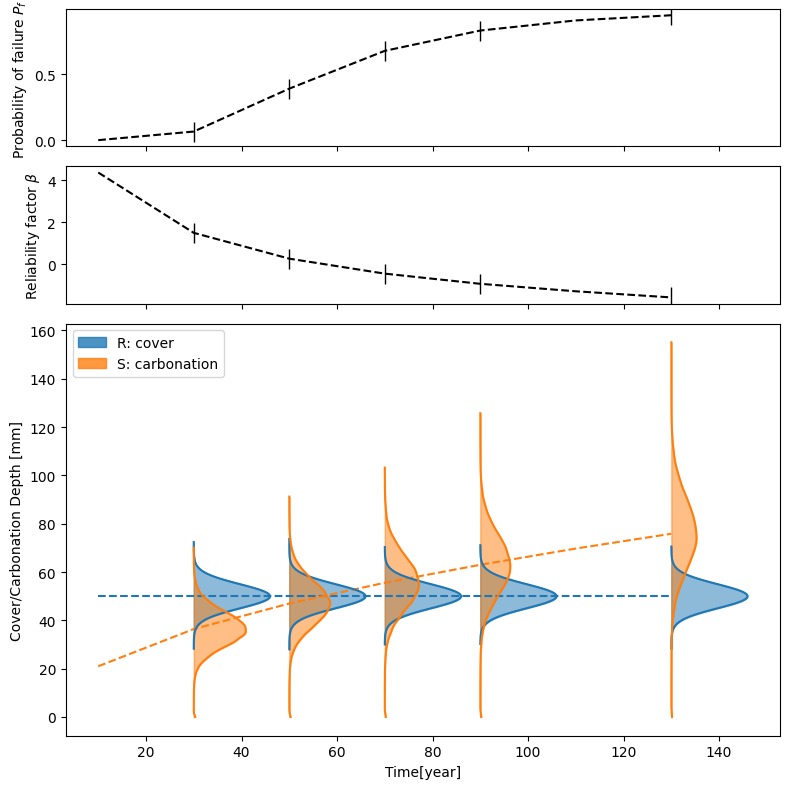

In [4]:
# Carbonation for a list of time steps

# Define a list of time steps (years) for carbonation analysis
year_lis = np.arange(10, 150, 20)  # Time steps from 10 to 150 years, with a step of 20 years

# Compute the probability of failure (P_f) and reliability index (β) over the time steps
pf_lis, beta_lis = carb_model_cal.carb_with_year(
    year_lis=year_lis,  # List of years
    plot=True,          # Enable plotting of results
    amplify=200         # Amplification factor for better visualization
)
